In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import os
import requests
import zipfile
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, models
import cv2

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image, ImageEnhance
import os

# Function to apply variations to a single image
def apply_variations_to_image(original_image):
    # Resize the image to 50x50 pixels
    resized_image = original_image.resize((50, 50))
    if resized_image.mode == 'RGBA':
        resized_image = resized_image.convert('RGB')

    # Define ranges for adjustments
    contrast_levels = [0.25, 0.5, 1.0, 1.5]
    brightness_levels = [0.25, 0.5, 1.0, 1.5]
    sharpness_levels = [0.25, 0.5, 1.0, 1.5]
    saturation_levels = [0.25, 0.5, 1.0, 1.5]

    variations = []
    for contrast in contrast_levels:
        for brightness in brightness_levels:
            for sharpness in sharpness_levels:
                for saturation in saturation_levels:
                    enhancer = ImageEnhance.Contrast(resized_image)
                    img_contrast = enhancer.enhance(contrast)

                    enhancer = ImageEnhance.Brightness(img_contrast)
                    img_brightness = enhancer.enhance(brightness)

                    enhancer = ImageEnhance.Sharpness(img_brightness)
                    img_sharpness = enhancer.enhance(sharpness)

                    enhancer = ImageEnhance.Color(img_sharpness)
                    img_saturation = enhancer.enhance(saturation)

                    variations.append(img_saturation)

    return variations

# Function to process all images in a directory and save them in the output directory
def process_directory(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                original_image = Image.open(image_path)

                variations = apply_variations_to_image(original_image)

                # Create the output subdirectory within the output directory
                relative_path = os.path.relpath(root, input_dir)
                output_subdir = os.path.join(output_dir, relative_path)
                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)

                for i, img_variation in enumerate(variations):
                    # Construct the output filename
                    output_filename = f"{os.path.splitext(file)[0]}_var{i}.jpg"
                    output_path = os.path.join(output_subdir, output_filename)

                    # Save the variation in the corresponding subdirectory
                    img_variation.save(output_path)

# Example usage
root_input_dir = '/content/drive/MyDrive/training'  # Update this to your input directory's path
root_output_dir = '/content/data'  # Update this to your desired output directory

# Ensure the output directory exists
if not os.path.exists(root_output_dir):
    os.makedirs(root_output_dir)

process_directory(root_input_dir, root_output_dir)

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize((50, 50)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
data_dir = "/content/data"
dataset = datasets.ImageFolder(data_dir, transform=data_transform)

In [ ]:

from sklearn.model_selection import train_test_split
train_size = 0.9999999999999999
train_dataset, test_dataset = train_test_split(dataset, train_size=train_size, shuffle=True, random_state=42)

batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:11<00:00, 49.2MB/s]


Epoch 1/30, Loss: 0.04366721875158176974, Train Accuracy: 98.41%, Test Accuracy: 100.00%
Epoch 2/30, Loss: 0.00020887808865504057, Train Accuracy: 100.00%, Test Accuracy: 100.00%
Epoch 3/30, Loss: 0.00001916285391725105, Train Accuracy: 100.00%, Test Accuracy: 100.00%
Epoch 4/30, Loss: 0.00002277009657757215, Train Accuracy: 100.00%, Test Accuracy: 100.00%
Epoch 5/30, Loss: 0.00149512307756331417, Train Accuracy: 99.96%, Test Accuracy: 100.00%
Epoch 6/30, Loss: 0.00001361869587041089, Train Accuracy: 100.00%, Test Accuracy: 100.00%
Epoch 7/30, Loss: 0.00000637015372330238, Train Accuracy: 100.00%, Test Accuracy: 100.00%
Epoch 8/30, Loss: 0.00000659026561063011, Train Accuracy: 100.00%, Test Accuracy: 100.00%
Epoch 9/30, Loss: 0.00000338895184898932, Train Accuracy: 100.00%, Test Accuracy: 100.00%
Epoch 10/30, Loss: 0.00000316675314113948, Train Accuracy: 100.00%, Test Accuracy: 100.00%
Epoch 11/30, Loss: 0.00000264571760003416, Train Accuracy: 100.00%, Test Accuracy: 100.00%
Epoch 12/3

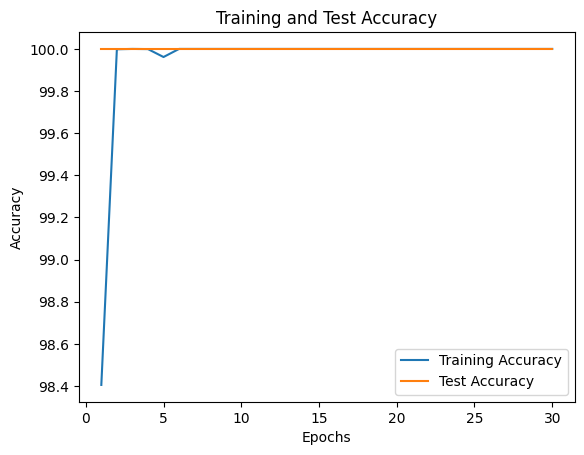

In [ ]:
vgg16 = torchvision.models.vgg16(pretrained=True)
feature_extractor = nn.Sequential(*list(vgg16.features.children())[:-1])
custom_classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(4608, 4608),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4608, 4608),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4608, 6)
)

model = nn.Sequential(

    feature_extractor,
    custom_classifier
)

for param in feature_extractor.parameters():
    param.requires_grad = True
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


num_epochs = 30
train_accuracy_list = []
test_accuracy_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_total = 0
    train_correct = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total
    train_accuracy_list.append(train_accuracy)

    model.eval()
    test_total = 0
    test_correct = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
             _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    test_accuracy_list.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.20f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")
epochs = list(range(1, num_epochs + 1))
# Plotting
plt.plot(epochs, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')
plt.show()

In [ ]:
torch.save(model, "30Epoch_vgg16_augmented_Data_new.pth")

In [ ]:
%cd /content/drive/My Drive/
!cp "/content/30Epoch_vgg16_augmented_Data_new.pth" "/content/drive/My Drive/"

/content/drive/My Drive


In [ ]:
model = torch.load('/content/drive/MyDrive/Task_4a_Model.pth')
weights = model.state_dict()
save_path = '/content/drive/My Drive/Task_4a_Model_Weights.pth'
torch.save(weights, save_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Task_4a_Model.pth'